Get data from 'final_merge.csv'

Adding 'Rating-Category' column

Do linear regresson and decision tree

Compare their MSE and R2

Then, we got that the MSE and R2 of linear regresson is better then dicision tree

In [73]:
import pandas as pd
books_df = pd.read_csv('final_merge.csv')

In [74]:
# Import all modules needed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

Make Rating Category

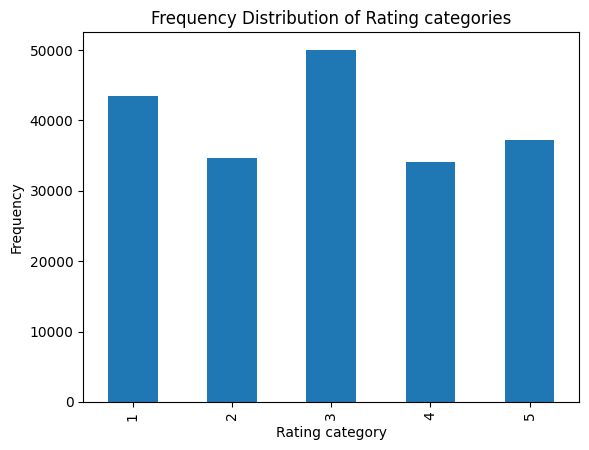

   User-ID        ISBN  Book-Rating                            Book-Title  \
0   276744  038550120X            7                         painted house   
1   276754  0684867621            8           girl loved tom gordon novel   
2   276755  0451166892            5                          pillar earth   
3   276762  0380711524            5                          see jane run   
4   276772  0553572369            7  pay dirt mr murphy mystery paperback   

      Book-Author  Year-Of-Publication Book-Publisher Year-Of-Publication-Bin  \
0    JOHN GRISHAM                 2001      Doubleday            [2000, 2020)   
1    Stephen King                 1999       Scribner            [1980, 2000)   
2     Ken Follett                 1996    Signet Book            [1980, 2000)   
3    Joy Fielding                 1992           Avon            [1980, 2000)   
4  RITA MAE BROWN                 1996         Bantam            [1980, 2000)   

   Book-Author-Encode  Book-Publisher-Encode  Year

In [75]:
# Categorize rating
books_df['Rating-Category'] = pd.cut(books_df['Book-Rating'], 
                                    bins=[0, 6, 7, 8, 9,10], 
                                    labels=[1, 2, 3, 4, 5], 
                                    right=True)
rating_counts = books_df['Rating-Category'].value_counts().sort_index()
rating_counts.plot(kind='bar')

# Set plot title and labels
plt.title('Frequency Distribution of Rating categories')
plt.xlabel('Rating category')
plt.ylabel('Frequency')

# Display the plot
plt.show()

# Display the updated DataFrame
print(books_df.head())

Regresson

In [76]:
x = books_df.drop(columns=['ISBN', 'Book-Rating', 'Rating-Category', 'Book-Title', 'Book-Author', 'Book-Publisher', 'Year-Of-Publication-Bin', 'User-City', 'User-State', 'User-Country', 'User-Age-Bin'])
y = books_df['Book-Rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print(x.dtypes)

# Compute MSE and R2 of linear regresson
linear_reg= LinearRegression()
linear_scores = cross_val_score(linear_reg, x, y, cv= 5, scoring= 'neg_mean_squared_error')
linear_r2_scores = cross_val_score(linear_reg, x ,y, cv=5, scoring = 'r2')
linear_rmse_scores= (-linear_scores)**0.5

print('Linear Regression Cross-Validation RMSE Scores:')
print(linear_rmse_scores)
print('Linear Regression Mean RMSE:', linear_rmse_scores.mean())
print('Linear Regression Cross-Validation R^2 Scores:')
print(linear_r2_scores)
print('Linear Regression Mean R^2:', linear_r2_scores.mean())

User-ID                           int64
Year-Of-Publication               int64
Book-Author-Encode                int64
Book-Publisher-Encode             int64
Year-Of-Publication-Bin-Encode    int64
User-Age                          int64
User-City_Encoded                 int64
User-State_Encoded                int64
User-Country_Encoded              int64
dtype: object
Linear Regression Cross-Validation RMSE Scores:
[1.78638705 1.75202034 1.77255042 1.78190649 1.81757841]
Linear Regression Mean RMSE: 1.7820885424774655
Linear Regression Cross-Validation R^2 Scores:
[0.00835017 0.00592485 0.00797039 0.00273963 0.00391927]
Linear Regression Mean R^2: 0.005780863140058235


In [77]:
# Initialize Decision Tree Regression model
dt_reg= DecisionTreeRegressor(random_state=42)

# Cross-validation for Decision Tree Regression
dt_scores = cross_val_score(dt_reg, x, y, cv=5,scoring='neg_mean_squared_error')
dt_r2_scores =cross_val_score(dt_reg, x, y, cv=5,scoring='r2')
dt_rmse_scores =(-dt_scores)**0.5
print('Decision Tree Regression Cross-Validation RMsE Scores:')
print(dt_rmse_scores)
print('Decision Tree Regression Mean RMSE:', dt_rmse_scores.mean())
print('Decision Tree Regression Cross-Validation R^2 Scores:')
print(dt_r2_scores)
print('Decision Tree Regression Mean R^2:', dt_r2_scores.mean())

Decision Tree Regression Cross-Validation RMsE Scores:
[2.75583279 2.5039367  2.52343331 2.52271318 2.66798267]
Decision Tree Regression Mean RMSE: 2.5947797299413082
Decision Tree Regression Cross-Validation R^2 Scores:
[-1.36000512 -1.03042814 -1.01053251 -0.9988237  -1.14621999]
Decision Tree Regression Mean R^2: -1.1092018929514853
